In [2]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import pandas as pd
import csv
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy import integrate
from lmfit import minimize, Parameters, Parameter, report_fit
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import random
from shapely.geometry import Polygon
from shapely.geometry import Point
import os
import glob

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
import tensorflow_probability as tfp

2023-04-12 11:19:30.975413: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
#rotates an MxN matrix 180 degrees
def rotate_180(array, M, N, out):
    for i in range(M):
        for j in range(N):
            out[i, N-1-j] = array[M-1-i, j]

In [20]:
#rotates an MxN matrix 180 degrees
def rotate_180(array, M, N, out):
    for i in range(M):
        for j in range(N):
            out[i, N-1-j] = array[M-1-i, j]
#calculates incersection between a pair of polygons
def calculate_iou(box_1, box_2):
    poly_1 = Polygon(box_1)
    poly_2 = Polygon(box_2)
    iou = poly_2.intersection(poly_1).area / poly_1.union(poly_2).area
    proportion=poly_2.area/(poly_1.union(poly_2).area)
    return (iou/proportion)
 

#creates a map (250x250 martrix) with the amount of energy imparted on each element surface of the FEA model using sphereical cap model

def vlocal(x_star,y_star,a,radius,areaeqdiameter,velocity):
    x_grid=(np.linspace(0,249,250)*0.02)+0.01
    y_grid=(np.linspace(0,249,250)*0.02)+0.01
    h=-np.sqrt((radius**2)-(a**2))+radius
    if np.isnan(h)==1:
        h=0
    if np.isinf(h) == 1:
        h=0
    

    e_total=((0.5*(4/3)*np.pi*(7.98*10**-9)*((areaeqdiameter/2)**3)*(velocity**2)))
    v_total=(1/3)*np.pi*(h**2)*((3*radius)-h)
    sf=e_total/v_total
    v=np.zeros((250,250))
    nrange = np.array([int((x_star-a)/.02)-1, int((x_star+a)/.02)+1])
    prange = np.array([int((y_star-a)/.02)-1, int((y_star+a)/.02)+1])


    for n in range (nrange[0],nrange[1],1):
        for p in range (prange[0],prange[1],1):
            z=(np.sqrt((radius**2)-(x_grid[n]**2)+(2*x_grid[n]*x_star)-(x_star**2)-(y_grid[p]**2)+(2*y_grid[p]*y_star)-(y_star**2)))-(radius-h)
            if z < 0:
                z=0
            if np.isnan(z)==1:
                z=0
            if np.isinf(z) == 1:
                x=0
            v[n,p]=z*0.02*0.02*sf


    isthevaluenan=np.isnan(v)
    v[isthevaluenan]=0

    return(v)

def impactenergyfile(name,velocity):
    data=pd.read_csv("{}.txt".format(name))
    energyplot=np.zeros((250,250))
    energytemp=np.zeros((250,250,data.shape[0]))
    for n in range (0, data.shape[0],1):
        a=0.11442655*(((0.5*(4/3)*np.pi*(7.98*10**-9)*((data.AreaEqDiameter[n]/2)**3)*(velocity**2)))**0.28999685)*((data.impactdiameter[n])**0.33790162)
        energytemp[:,:,n]=vlocal(x_star=data.x[n],y_star=data.y[n],a=a,radius=data.impactdiameter[n]/2, areaeqdiameter=data.AreaEqDiameter[n], velocity=velocity)
        
    energyplot=np.sum(energytemp, axis=2)
        
    energyplot=energyplot.T

    np.savetxt('{}_impactenergy.csv'.format(name), energyplot, delimiter=',')
        



In [17]:
z=np.sqrt(-2)
if np.isnan(z)==1:
    z=0

z

C:\Users\lfeltner\AppData\Local\Temp\ipykernel_8884\309435105.py:1: RuntimeWarning: invalid value encountered in sqrt
  z=np.sqrt(-2)


0

In [13]:
for p in range (1,11,1):
    impactenergyfile('CW32_Test{}'.format(p),65000)
    print(p)

/var/folders/z0/_ky4gjk134j8xr5wp58gfm6h0000gn/T/ipykernel_75507/1583023852.py:80: RuntimeWarning: invalid value encountered in sqrt
  z=(np.sqrt((radius**2)-(x_grid[n]**2)+(2*x_grid[n]*x_star)-(x_star**2)-(y_grid[p]**2)+(2*y_grid[p]*y_star)-(y_star**2)))-(radius-h)


1


/var/folders/z0/_ky4gjk134j8xr5wp58gfm6h0000gn/T/ipykernel_75507/1583023852.py:80: RuntimeWarning: invalid value encountered in sqrt
  z=(np.sqrt((radius**2)-(x_grid[n]**2)+(2*x_grid[n]*x_star)-(x_star**2)-(y_grid[p]**2)+(2*y_grid[p]*y_star)-(y_star**2)))-(radius-h)


2


/var/folders/z0/_ky4gjk134j8xr5wp58gfm6h0000gn/T/ipykernel_75507/1583023852.py:80: RuntimeWarning: invalid value encountered in sqrt
  z=(np.sqrt((radius**2)-(x_grid[n]**2)+(2*x_grid[n]*x_star)-(x_star**2)-(y_grid[p]**2)+(2*y_grid[p]*y_star)-(y_star**2)))-(radius-h)


3


/var/folders/z0/_ky4gjk134j8xr5wp58gfm6h0000gn/T/ipykernel_75507/1583023852.py:80: RuntimeWarning: invalid value encountered in sqrt
  z=(np.sqrt((radius**2)-(x_grid[n]**2)+(2*x_grid[n]*x_star)-(x_star**2)-(y_grid[p]**2)+(2*y_grid[p]*y_star)-(y_star**2)))-(radius-h)


4


/var/folders/z0/_ky4gjk134j8xr5wp58gfm6h0000gn/T/ipykernel_75507/1583023852.py:80: RuntimeWarning: invalid value encountered in sqrt
  z=(np.sqrt((radius**2)-(x_grid[n]**2)+(2*x_grid[n]*x_star)-(x_star**2)-(y_grid[p]**2)+(2*y_grid[p]*y_star)-(y_star**2)))-(radius-h)


5


/var/folders/z0/_ky4gjk134j8xr5wp58gfm6h0000gn/T/ipykernel_75507/1583023852.py:80: RuntimeWarning: invalid value encountered in sqrt
  z=(np.sqrt((radius**2)-(x_grid[n]**2)+(2*x_grid[n]*x_star)-(x_star**2)-(y_grid[p]**2)+(2*y_grid[p]*y_star)-(y_star**2)))-(radius-h)


6


/var/folders/z0/_ky4gjk134j8xr5wp58gfm6h0000gn/T/ipykernel_75507/1583023852.py:80: RuntimeWarning: invalid value encountered in sqrt
  z=(np.sqrt((radius**2)-(x_grid[n]**2)+(2*x_grid[n]*x_star)-(x_star**2)-(y_grid[p]**2)+(2*y_grid[p]*y_star)-(y_star**2)))-(radius-h)


7


/var/folders/z0/_ky4gjk134j8xr5wp58gfm6h0000gn/T/ipykernel_75507/1583023852.py:80: RuntimeWarning: invalid value encountered in sqrt
  z=(np.sqrt((radius**2)-(x_grid[n]**2)+(2*x_grid[n]*x_star)-(x_star**2)-(y_grid[p]**2)+(2*y_grid[p]*y_star)-(y_star**2)))-(radius-h)


8


/var/folders/z0/_ky4gjk134j8xr5wp58gfm6h0000gn/T/ipykernel_75507/1583023852.py:80: RuntimeWarning: invalid value encountered in sqrt
  z=(np.sqrt((radius**2)-(x_grid[n]**2)+(2*x_grid[n]*x_star)-(x_star**2)-(y_grid[p]**2)+(2*y_grid[p]*y_star)-(y_star**2)))-(radius-h)


9


/var/folders/z0/_ky4gjk134j8xr5wp58gfm6h0000gn/T/ipykernel_75507/1583023852.py:80: RuntimeWarning: invalid value encountered in sqrt
  z=(np.sqrt((radius**2)-(x_grid[n]**2)+(2*x_grid[n]*x_star)-(x_star**2)-(y_grid[p]**2)+(2*y_grid[p]*y_star)-(y_star**2)))-(radius-h)


10


In [14]:
for p in range (1,11,1):
    impactenergyfile('CW32_Train{}'.format(p),65000)
    print(p)

/var/folders/z0/_ky4gjk134j8xr5wp58gfm6h0000gn/T/ipykernel_75507/1583023852.py:80: RuntimeWarning: invalid value encountered in sqrt
  z=(np.sqrt((radius**2)-(x_grid[n]**2)+(2*x_grid[n]*x_star)-(x_star**2)-(y_grid[p]**2)+(2*y_grid[p]*y_star)-(y_star**2)))-(radius-h)


KeyboardInterrupt: 


circle=Point(data.x[p],data.y[p]).buffer(data.impactdiameter[p]/2)

runningtotal=runningtotal+((0.5*(4/3)*np.pi*(7.98*10**-9)*((data.AreaEqDiameter[p]/2)**3)*(65000**2)*((0.02**2)/(np.pi*((data.impactdiameter[p]/2)**2)))))

original version^ 

Changing 2 in denominator to scale impact diameter


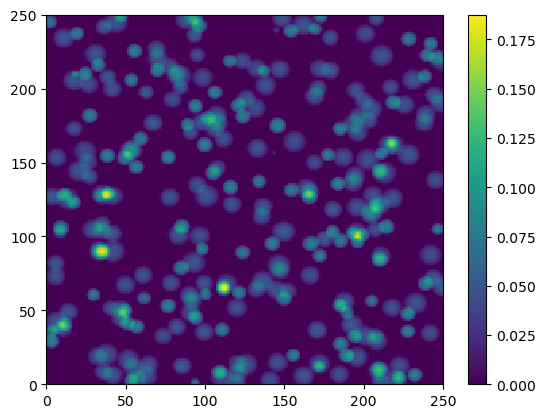

In [61]:
#what the impact energy distributions look like over the surface of the part
data=np.genfromtxt('CW32_Train1_impactenergy.csv', delimiter=',')
plt.pcolormesh(data)
plt.colorbar()

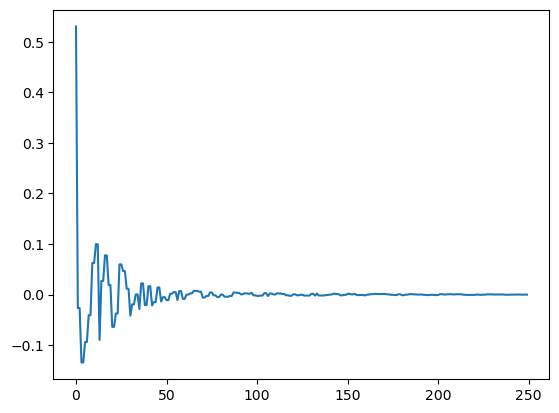

In [74]:
plt.plot(np.array(tf.linalg.eigvals(np.array(tf.linalg.normalize(data)[0]))))

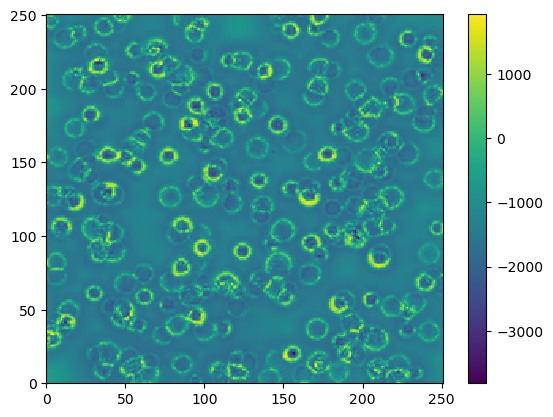

In [60]:
data2=np.genfromtxt('CW32_Train1_surfstress.csv', delimiter=',')
plt.pcolormesh(data2)
plt.colorbar()

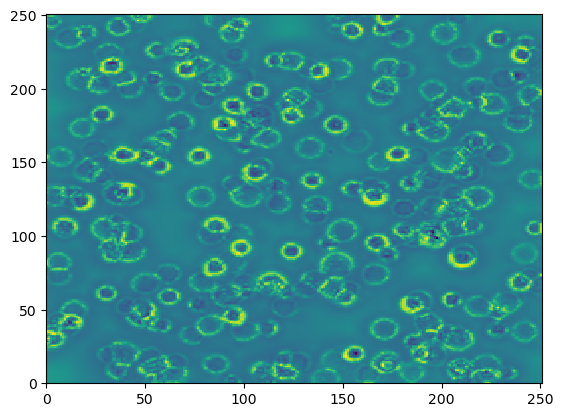

In [72]:
plt.pcolormesh(tf.linalg.normalize(data2)[0])

c:\Users\lfeltner\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


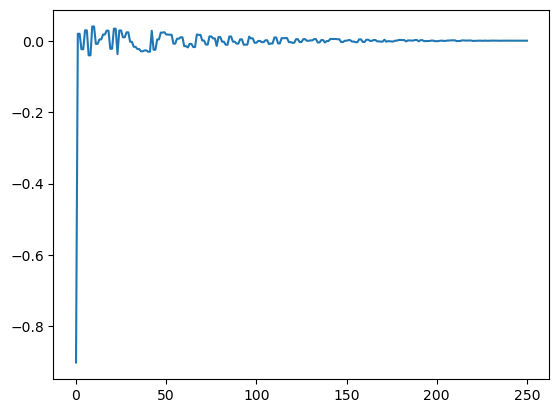

In [73]:
plt.plot(np.array(tf.linalg.eigvals(np.array(tf.linalg.normalize(data2)[0]))))

In [45]:
sliceddata=tf.image.extract_patches(images=data.reshape(1,data.shape[0], data.shape[1],1), sizes=(1,18,18,1), strides=(1,1,1,1), rates=(1,1,1,1), padding='VALID')
sliceddata.shape

TensorShape([1, 233, 233, 324])

In [46]:
np.std(sliceddata[0,:,:,:])/np.mean(sliceddata[0,:,:,:])

1.6131201813293978

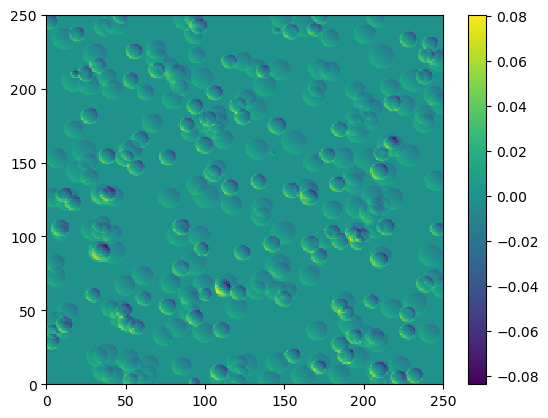

In [57]:
gradients=tf.image.image_gradients(tf.convert_to_tensor(data.reshape(1,data.shape[0], data.shape[1],1)))
gradients=np.array(gradients)
gradients.shape
plt.pcolormesh(np.sum(gradients[0:2,0,:,:,0], axis=0))
plt.colorbar()

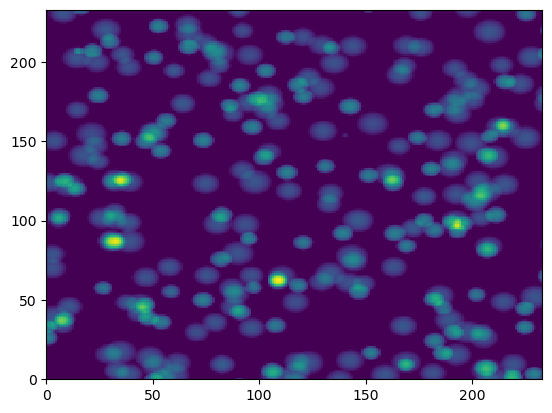

In [36]:
plt.pcolormesh(sliceddata[0,:,:,57])

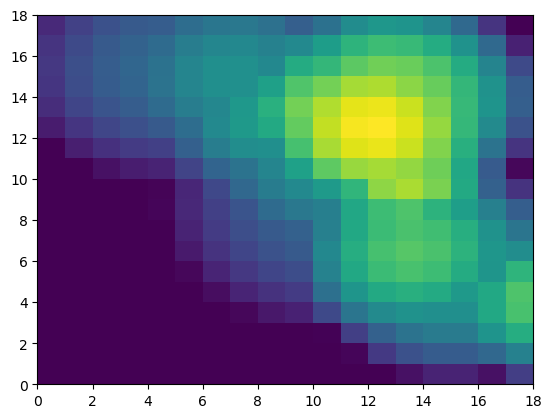

In [37]:
sliceddata=np.array(sliceddata)
plt.pcolormesh(sliceddata[0,36,36,:].reshape(18,18))

In [15]:
data=np.genfromtxt('CW32_Test2_impactenergy.csv', delimiter=',')
np.isnan(data)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

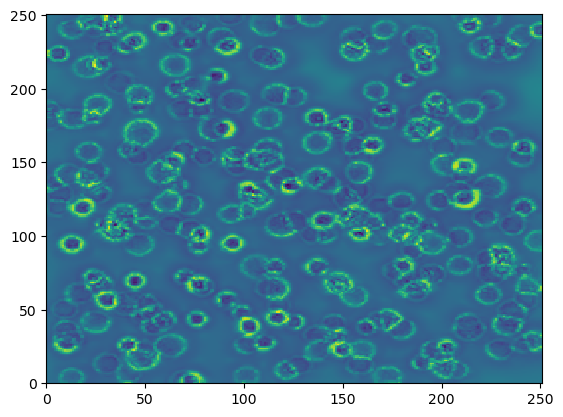

In [7]:
data=np.genfromtxt('CW32_Test1_surfstress.csv', delimiter=',')
plt.pcolormesh(data)

In [5]:
#Takes in the name, file number (for sets of multiple training and test data files), and the desired width of the training dataset matrix
#Opens the surface stress field from the FEA model (251x251 matrix- stress at each node on the surface)
#Iterates accross the surface of the part and isolates every region of size (numcells x numcells), then reshapes it to size (numcells**2)
#Each row of the table is a set of inputs
#The stress at the center of each (numcells x numcells) region is saved in a seperate table, each row of the stress cooresponds to the training target
#The average stresses has the same format, but instead of the stress at the center of the matrix, it is the average of the stress values of all nodes that make up the region

def gentestdata(name, numfile, numcells):
    densitydata=np.genfromtxt('{}{}_impactenergy.csv'.format(name,numfile), delimiter=',')
    stressdata=np.genfromtxt('{}{}_surfstress.csv'.format(name,numfile), delimiter=',')

    flatstress=np.array([])
    averagestress=np.empty(((numcells+1)**2,(int(len(densitydata)-numcells)+1)**2))
    flatdensity=np.empty((numcells**2,(int(len(densitydata)-numcells)+1)**2))
    tempdensity=np.empty((numcells,numcells))

    for n in range(0,int(len(densitydata)-numcells)+1):
        for p in range (0,int(len(densitydata)-numcells)+1):
            tempdensity[:,:]=densitydata[n:n+numcells, p:p+numcells]
            tempstress=stressdata[int(n+numcells/2), int(p+numcells/2)]
            flatstress=np.append(flatstress,tempstress)
            flatdensity[:,p+(n*(len(densitydata)-numcells+1))]=tempdensity.reshape((numcells**2,1)).flatten()
            averagestress[:,p+(n*(len(densitydata)-numcells+1))]=stressdata[n:n+numcells+1,p:p+numcells+1].reshape(((numcells+1)**2,1)).flatten()


    averagestresses=np.average(averagestress,axis=0)

    return(flatdensity,flatstress,averagestresses)


In [6]:
#Generates the test and training data for all 10 datasets

testdensity, teststress, testavgstress = gentestdata('CW32_Test',1,18)
testdensity=testdensity.T
fulltestdensity=np.empty((10*testdensity.shape[0],testdensity.shape[1]))
fullteststress=np.empty((10*teststress.shape[0]))
fulltestavgstress=np.empty((10*testavgstress.shape[0]))
for n in range (1,11):
    testdensity1, teststress1, testavgstress1 = gentestdata('CW32_Test',n,18)
    testdensity1=testdensity1.T
    fulltestdensity[(n-1)*testdensity.shape[0]:n*testdensity.shape[0],:]=testdensity1
    fullteststress[(n-1)*teststress1.shape[0]:n*teststress1.shape[0]]=teststress1
    fulltestavgstress[(n-1)*testavgstress1.shape[0]:n*testavgstress1.shape[0]]=testavgstress1

trainingdensity, trainingstress, trainavgstress = gentestdata('CW32_Train',1,18)
trainingdensity=trainingdensity.T
fulltrainingdensity=np.empty((10*trainingdensity.shape[0],trainingdensity.shape[1]))
fulltrainingstress=np.empty((10*trainingstress.shape[0]))
fulltrainavgstress=np.empty((10*trainavgstress.shape[0]))
for n in range (1,11):
    trainingdensity1, trainingstress1, trainavgstress1 = gentestdata('CW32_Train',n,18)
    trainingdensity1=trainingdensity1.T
    fulltrainingdensity[(n-1)*trainingdensity.shape[0]:n*trainingdensity.shape[0],:]=trainingdensity1
    fulltrainingstress[(n-1)*trainingstress1.shape[0]:n*trainingstress1.shape[0]]=trainingstress1
    fulltrainavgstress[(n-1)*trainavgstress1.shape[0]:n*trainavgstress1.shape[0]]=trainavgstress1



In [7]:
# For numcells=30, the 10 simulations made 488410 training sets that are 900 values long each
fulltestdensity.shape

(542890, 324)

In [8]:
array=np.isnan(fulltestdensity)
np.sum(array)

0

In [13]:
# #defines the model, 3 layers, 4 nodes on the first 2, 1 node on the output, with a linear activation energy so that the model can output negative numbers


# def build_model():
#     model = models.Sequential()
#     model.add(layers.Dense(1024, activation='selu',
#                            input_shape=(trainingdensity.shape[1],)))
    
#     model.add(layers.Dense(512, activation='selu'))
#     model.add(layers.Dense(256, activation='selu'))
#     model.add(layers.Dense(128, activation='selu'))
#     model.add(layers.Dense(64, activation='linear'))

#     model.add(layers.Dense(1))
#     model.compile(optimizer='Nadam', loss=tf.keras.losses.Huber(delta=3000.0), metrics=['mae'])
#     return model

In [35]:
#defines the model, 3 layers, 4 nodes on the first 2, 1 node on the output, with a linear activation energy so that the model can output negative numbers

def build_model():
    tf.random.set_seed(420)

    model = models.Sequential()
    model.add(layers.Normalization())
    model.add(layers.Dense(324, activation='selu',
                           input_shape=(traindensity.shape[1],)))
    
    model.add(layers.Dense(324, activation='selu'))
    model.add(layers.Dense(324, activation='selu'))
    model.add(layers.Normalization(invert=True))
    model.add(layers.Dense(1))
    model.compile(optimizer='Nadam', loss=tf.keras.losses.Huber(delta=500.0), metrics=['mae'])
    return model

In [8]:
# Define the prior weight distribution as Normal of mean=0 and stddev=1.
# Note that, in this example, the we prior distribution is not trainable,
# as we fix its parameters.
def prior(kernel_size, bias_size, dtype=None):
    n = kernel_size + bias_size
    prior_model = keras.Sequential(
        [
            tfp.layers.DistributionLambda(
                lambda t: tfp.distributions.MultivariateNormalDiag(
                    loc=tf.zeros(n), scale_diag=tf.ones(n)
                )
            )
        ]
    )
    return prior_model
# Define variational posterior weight distribution as multivariate Gaussian.
# Note that the learnable parameters for this distribution are the means,
# variances, and covariances.
def posterior(kernel_size, bias_size, dtype=None):
    n = kernel_size + bias_size
    posterior_model = keras.Sequential(
        [
            tfp.layers.VariableLayer(
                tfp.layers.MultivariateNormalTriL.params_size(n), dtype=dtype
            ),
            tfp.layers.MultivariateNormalTriL(n),
        ]
    )
    return posterior_model

In [33]:
#defines the model, 3 layers, 4 nodes on the first 2, 1 node on the output, with a linear activation energy so that the model can output negative numbers
def build_BNNmodel():
    model = models.Sequential()
    model.add(tfp.layers.DenseVariational(20, activation='elu',make_prior_fn=prior,make_posterior_fn=posterior, 
                           input_shape=(traindensity.shape[1],)))
    model.add(tfp.layers.DenseVariational(20, activation='elu', make_prior_fn=prior,make_posterior_fn=posterior,))
    model.add(tfp.layers.DenseVariational(20, activation='elu', make_prior_fn=prior,make_posterior_fn=posterior,))
    model.add(tfp.layers.DenseVariational(20, activation='elu', make_prior_fn=prior,make_posterior_fn=posterior,))

    model.add(tfp.layers.DenseVariational(1, make_prior_fn=prior,make_posterior_fn=posterior,))
    model.compile(optimizer='Nadam', loss='mse', metrics=['mae'])
    return model

In [10]:
tf.config.list_physical_devices('GPU')

[]

In [36]:

#trains and validates

model = build_model()
model.fit(traindensity, trainstress,epochs=10, batch_size=500, verbose=1, use_multiprocessing=True)
val_mse, val_mae = model.evaluate(testdensity, teststress, verbose=1)


Epoch 1/10
1086/1086 [==============================] - 11s 10ms/step - loss: 108844.3828 - mae: 371.5360
Epoch 2/10
1086/1086 [==============================] - 11s 10ms/step - loss: 86256.9688 - mae: 313.8726
Epoch 3/10
1086/1086 [==============================] - 11s 10ms/step - loss: 77987.1484 - mae: 290.8129
Epoch 4/10
1086/1086 [==============================] - 11s 10ms/step - loss: 74788.8984 - mae: 282.3813
Epoch 5/10
1086/1086 [==============================] - 12s 11ms/step - loss: 72800.6484 - mae: 277.6736
Epoch 6/10
1086/1086 [==============================] - 11s 10ms/step - loss: 71315.5234 - mae: 273.9987
Epoch 7/10
1086/1086 [==============================] - 12s 11ms/step - loss: 70247.7031 - mae: 271.1632
Epoch 8/10
1086/1086 [==============================] - 12s 11ms/step - loss: 69386.9609 - mae: 269.0367
Epoch 9/10
1086/1086 [==============================] - 12s 11ms/step - loss: 68710.7109 - mae: 267.2597
Epoch 10/10
16966/16966 [=============================

In [95]:
numbers=np.logspace(1, 5, num=10, base=10)
numbers=np.round(numbers)

array([1.0000e+01, 2.8000e+01, 7.7000e+01, 2.1500e+02, 5.9900e+02,
       1.6680e+03, 4.6420e+03, 1.2915e+04, 3.5938e+04, 1.0000e+05])

In [97]:
meanvals=np.zeros((100,len(numbers)))
for n in range (0,len(numbers)):`1`
    for p in range (0,100):

        randsample=random.sample(range(0, testdensity.shape[0]), int(numbers[n]))
        testvals=model.predict(testdensity[randsample])
        meanvals[p,n]=np.mean(testvals)

# #plt.plot(testvals[0:1000],teststress[0:1000],'o')
# f, ax = plt.subplots(figsize=(6, 6))
# sns.scatterplot(x=testvals.flatten(), y=(testvals.flatten()-teststress[randsample].flatten()))
# sns.histplot(x=testvals.flatten(), y=(testvals.flatten()-teststress[randsample].flatten()), bins=50, pthresh=.1, cmap="mako")
# sns.kdeplot(x=testvals.flatten(), y=(testvals.flatten()-teststress[randsample].flatten()), levels=5, color="w", linewidths=1)
# plt.grid()

3125/3125 [==============================] - 4s 1ms/step


Text(0, 0.5, 'Standard Deviation of Predicted Stress')

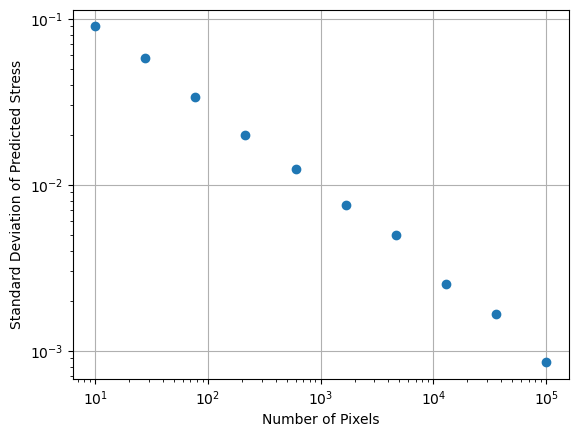

In [104]:
plt.loglog(numbers,abs(np.std(meanvals,axis=0)/np.mean(meanvals,axis=0)),'o')
plt.grid()
plt.xlabel('Number of Pixels')
plt.ylabel('Standard Deviation of Predicted Stress')

In [49]:
import sys
sys.maxsize

9223372036854775807

In [18]:

#trains and validates
model2 = build_BNNmodel()
model2.fit(fulltrainingdensity, fulltrainingstress,epochs=500, batch_size=50, verbose=1, use_multiprocessing=True)
val_mse, val_mae = model2.evaluate(fulltestdensity, fullteststress, verbose=1)


Epoch 1/500
   29/10858 [..............................] - ETA: 15:42 - loss: 1990199.2500 - mae: 1331.8247

KeyboardInterrupt: 

In [11]:
val_mse, val_mae = model2.evaluate(fulltestdensity, fullteststress, verbose=1)


  356/16966 [..............................] - ETA: 6:06 - loss: 527633.1875 - mae: 425.6368

KeyboardInterrupt: 

1697/1697 [==============================] - 2s 1ms/step


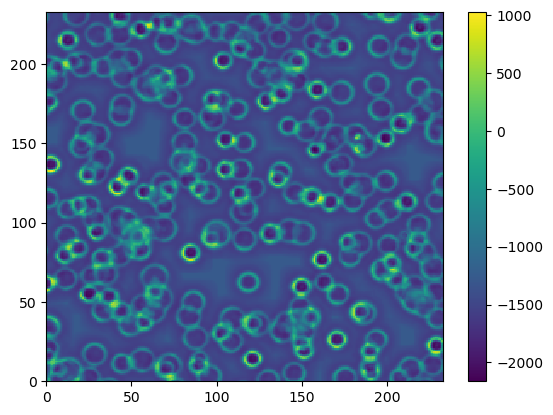

In [108]:
#runs a test to print out the stress data for one of the test simulations
trialdensity, trialstress, trialavgstress=gentestdata('CW32_Test', 3, 18)
trialdensity=trialdensity.T

data=model.predict(trialdensity)
data=data.reshape((int(np.sqrt(len(data))),int(np.sqrt(len(data)))))
plt.pcolormesh(data)
plt.colorbar()
#plt.clim(-2000,0)
#plt.savefig("NN_surfstress.png")

In [109]:
data=tf.convert_to_tensor(data.reshape(1,data.shape[0], data.shape[1],1))

In [110]:
truth=np.genfromtxt('CW32_Test3_surfstress.csv', delimiter=',')
truth=truth.reshape(1,truth.shape[0], truth.shape[1],1)
truth=tf.convert_to_tensor(truth[:,9:-9,9:-9,:])


tf.image.ssim(tf.cast(truth, dtype=tf.double), tf.cast(data, dtype=tf.double), max_val=10000.0)

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.76065165], dtype=float32)>

In [113]:
truth=np.genfromtxt('CW32_Test3_surfstress.csv', delimiter=',')
truth=truth.reshape(1,truth.shape[0], truth.shape[1],1)
impacttruth=np.genfromtxt('CW32_Test3_impactenergy.csv', delimiter=',')
impacttruth=impacttruth.reshape(1,impacttruth.shape[0], impacttruth.shape[1],1)
truth=tf.convert_to_tensor(truth[:,0:-1,0:-1,:])


tf.image.ssim(tf.cast(truth, dtype=tf.double), tf.cast(impacttruth, dtype=tf.double), max_val=10000.0)

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.00353522], dtype=float32)>

1697/1697 [==============================] - 31s 18ms/step


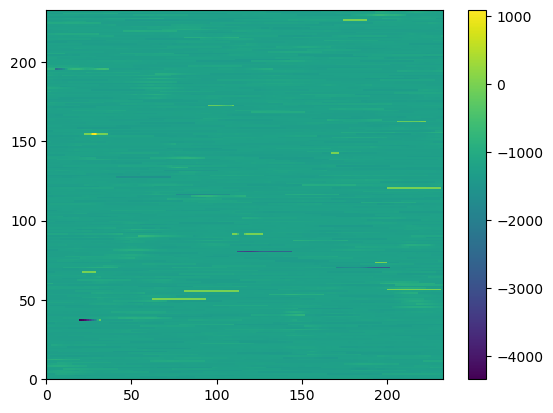

In [12]:
#runs a test to print out the stress data for one of the test simulations
trialdensity, trialstress, trialavgstress=gentestdata('CW32_Test', 3, 18)
trialdensity=trialdensity.T

data=model2.predict(trialdensity)
data=data.reshape((int(np.sqrt(len(data))),int(np.sqrt(len(data)))))
plt.pcolormesh(data)
plt.colorbar()
#plt.clim(-2000,0)
#plt.savefig("NN_surfstress.png")

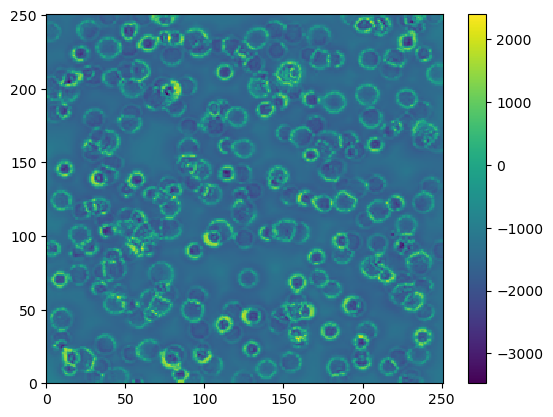

In [11]:
data2=np.genfromtxt('CW32_Test3_surfstress.csv', delimiter=',')
plt.pcolormesh(data2)
plt.colorbar()

In [17]:
np.std(data)/np.average(data)

-0.41120228

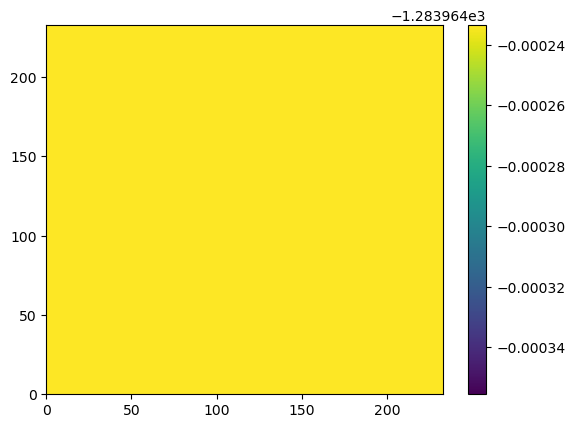

In [131]:
# #trialdensity=np.zeros((54289, 324))
# #data3=model.predict(trialdensity)
# #data3=data3.reshape((int(np.sqrt(len(data3))),int(np.sqrt(len(data3)))))
# plt.pcolormesh(data3)
# plt.colorbar()

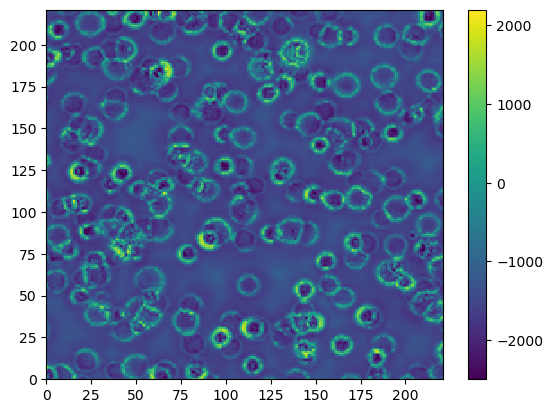

In [5]:
#what the actual FEA surface stress distribution looks like
data2=np.genfromtxt('CW32_Test3_surfstress.csv', delimiter=',')
plt.pcolormesh(data2[15:-15,15:-15])
plt.colorbar()
plt.clim(-2500, 2200)

In [12]:
np.std(data2)/np.average(data2)

-0.46488038104555196

In [13]:
differencematrix=abs(data-data2[9:-9,9:-9])
np.median(differencematrix)

134.66797851562524

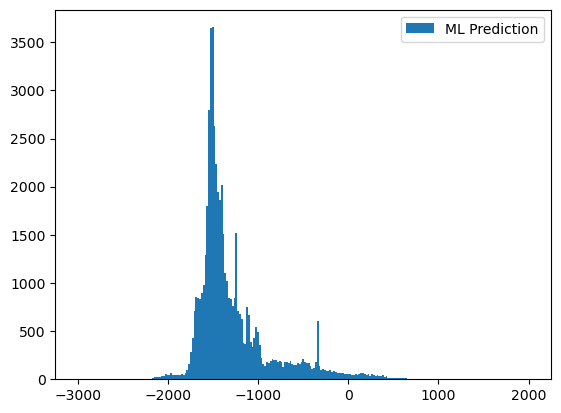

In [14]:
plt.hist(data.reshape(len(data)**2,1), bins=np.linspace(-3000,2000,250), label='ML Prediction')
# plt.hist(data2.reshape(len(data2)**2,1), bins=np.linspace(-3000,2000,100), label='FEA Prediction')
plt.legend(loc='best')
#plt.ylim(0,9000)

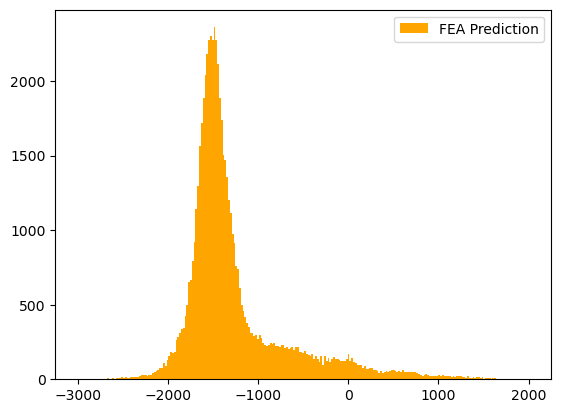

In [15]:
plt.hist(data2.reshape(len(data2)**2,1), bins=np.linspace(-3000,2000,250), label='FEA Prediction', color='orange')
plt.legend(loc='best')
#plt.ylim(0,9000)

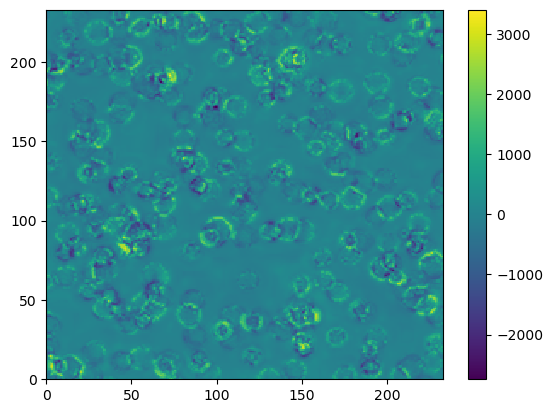

In [16]:
plt.pcolormesh(data2[9:-9,9:-9]-data)
plt.colorbar()

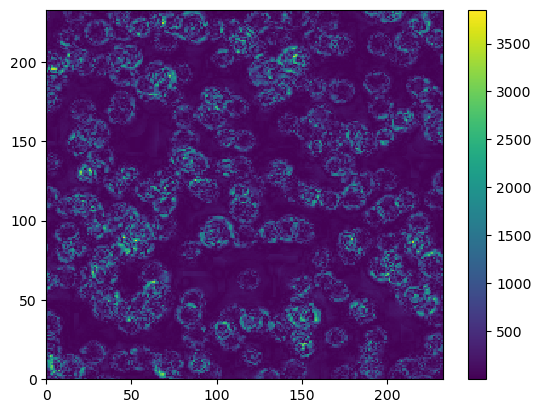

In [22]:
plt.pcolormesh(abs(data2[9:-9,9:-9]-data))
plt.colorbar()

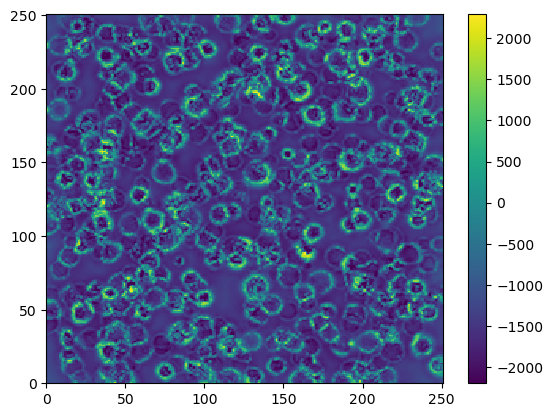

In [140]:
data4=np.genfromtxt('CW28_0945_20_49100_65000_90_Week1_surfstress.csv', delimiter=',')
plt.pcolormesh(data4)
plt.colorbar()
plt.clim(-2200, 2300)

In [138]:
#Takes in the name, file number (for sets of multiple training and test data files), and the desired width of the training dataset matrix
#Opens the surface stress field from the FEA model (251x251 matrix- stress at each node on the surface)
#Iterates accross the surface of the part and isolates every region of size (numcells x numcells), then reshapes it to size (numcells**2)
#Each row of the table is a set of inputs
#The stress at the center of each (numcells x numcells) region is saved in a seperate table, each row of the stress cooresponds to the training target
#The average stresses has the same format, but instead of the stress at the center of the matrix, it is the average of the stress values of all nodes that make up the region

def gentestdata2(name, numcells):
    densitydata=np.genfromtxt('{}_impactenergy.csv'.format(name), delimiter=',')
    stressdata=np.genfromtxt('{}_surfstress.csv'.format(name), delimiter=',')

    flatstress=np.array([])
    averagestress=np.empty(((numcells+1)**2,(int(len(densitydata)-numcells)+1)**2))
    flatdensity=np.empty((numcells**2,(int(len(densitydata)-numcells)+1)**2))
    tempdensity=np.empty((numcells,numcells))

    for n in range(0,int(len(densitydata)-numcells)+1):
        for p in range (0,int(len(densitydata)-numcells)+1):
            tempdensity[:,:]=densitydata[n:n+numcells, p:p+numcells]
            tempstress=stressdata[int(n+numcells/2), int(p+numcells/2)]
            flatstress=np.append(flatstress,tempstress)
            flatdensity[:,p+(n*(len(densitydata)-numcells+1))]=tempdensity.reshape((numcells**2,1)).flatten()
            averagestress[:,p+(n*(len(densitydata)-numcells+1))]=stressdata[n:n+numcells+1,p:p+numcells+1].reshape(((numcells+1)**2,1)).flatten()


    averagestresses=np.average(averagestress,axis=0)

    return(flatdensity,flatstress,averagestresses)


1697/1697 [==============================] - 4s 3ms/step


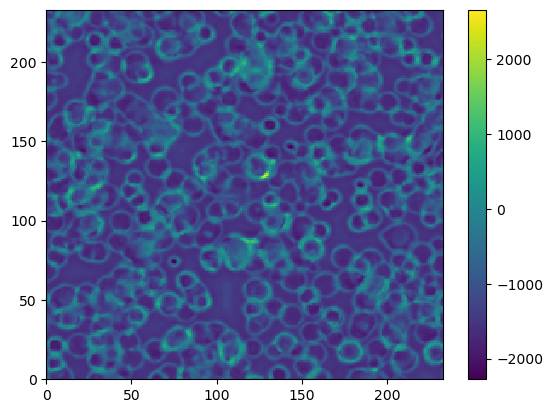

In [139]:
#runs a test to print out the stress data for one of the test simulations
trialdensity, trialstress, trialavgstress=gentestdata2('CW28_0945_20_49100_65000_90_Week1', 18)
trialdensity=trialdensity.T

data=model.predict(trialdensity)
data=data.reshape((int(np.sqrt(len(data))),int(np.sqrt(len(data)))))
plt.pcolormesh(data)
plt.colorbar()
#plt.savefig("NN_surfstress.png")

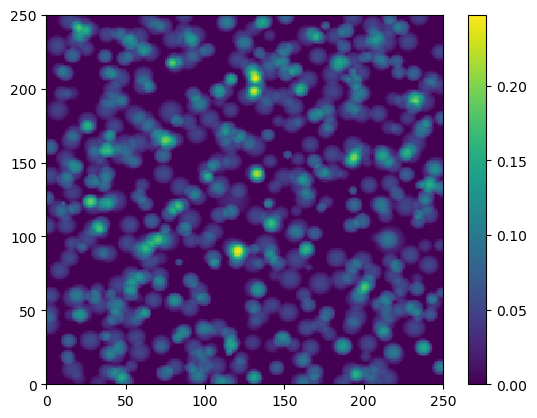

In [137]:
data4=np.genfromtxt('CW28_0945_20_49100_65000_90_Week1_impactenergy.csv', delimiter=',')
plt.pcolormesh(data4)
plt.colorbar()

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#import tensorflow_datasets as tfds
import tensorflow_probability as tfp

In [4]:
hidden_units = [8, 8, 8]
learning_rate = 0.001


def run_experiment(model, loss, train_dataset, test_dataset):

    model.compile(
        optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate),
        loss=loss,
        metrics=[keras.metrics.RootMeanSquaredError()],
    )

    print("Start training the model...")
    model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)
    print("Model training finished.")
    _, rmse = model.evaluate(train_dataset, verbose=0)
    print(f"Train RMSE: {round(rmse, 3)}")

    print("Evaluating model performance...")
    _, rmse = model.evaluate(test_dataset, verbose=0)
    print(f"Test RMSE: {round(rmse, 3)}")

In [5]:
def create_baseline_model():
    # Create hidden layers with deterministic weights using the Dense layer.
    for units in hidden_units:
        features = layers.Dense(units, activation="selu")(features)
    # The output is deterministic: a single point estimate.
    outputs = layers.Dense(units=1)(features)

    model = keras.Model(outputs=outputs)
    return model

In [6]:
num_epochs = 100
mse_loss = keras.losses.MeanSquaredError()
baseline_model = create_baseline_model()
run_experiment(baseline_model, mse_loss, train_dataset=[fulltrainingdensity,fulltrainingstress], test_dataset=[fulltestdensity,fullteststress])

UnboundLocalError: local variable 'features' referenced before assignment

In [22]:
data=np.genfromtxt('CW32_Train1_impactenergy.csv', delimiter=',')
data2=np.genfromtxt('CW32_Train1_surfstress.csv', delimiter=',')
data2=data2[9:-9,9:-9]
data3=np.genfromtxt('CW32_Test1_impactenergy.csv', delimiter=',')
data4=np.genfromtxt('CW32_Test1_surfstress.csv', delimiter=',')
data4=data4[9:-9,9:-9]
traindensity=np.array(tf.image.extract_patches(data.reshape(1,data.shape[0],data.shape[1],1), sizes=[1, 18, 18, 1], strides=[1, 1, 1, 1], rates=[1, 1, 1, 1], padding='VALID'))
traindensity=traindensity.reshape(1,traindensity.shape[1]*traindensity.shape[2],traindensity.shape[3])
trainstress=np.array(tf.image.extract_patches(data2.reshape(1,data2.shape[0],data2.shape[1],1), sizes=[1, 1, 1, 1], strides=[1, 1, 1, 1], rates=[1, 1, 1, 1], padding='VALID'))
trainstress=trainstress.reshape(1,trainstress.shape[1]*trainstress.shape[2],trainstress.shape[3])
testdensity=np.array(tf.image.extract_patches(data3.reshape(1,data3.shape[0],data3.shape[1],1), sizes=[1, 18, 18, 1], strides=[1, 1, 1, 1], rates=[1, 1, 1, 1], padding='VALID'))
testdensity=testdensity.reshape(1,testdensity.shape[1]*testdensity.shape[2],testdensity.shape[3])
teststress=np.array(tf.image.extract_patches(data4.reshape(1,data4.shape[0],data4.shape[1],1), sizes=[1, 1, 1, 1], strides=[1, 1, 1, 1], rates=[1, 1, 1, 1], padding='VALID'))
teststress=teststress.reshape(1,teststress.shape[1]*teststress.shape[2],teststress.shape[3])
for n in range (2,11):
    data=np.genfromtxt('CW32_Train{n}_impactenergy.csv'.format(n=n), delimiter=',')
    data2=np.genfromtxt('CW32_Train{n}_surfstress.csv'.format(n=n), delimiter=',')
    data2=data2[9:-9,9:-9]
    data3=np.genfromtxt('CW32_Test{n}_impactenergy.csv'.format(n=n), delimiter=',')
    data4=np.genfromtxt('CW32_Test{n}_surfstress.csv'.format(n=n), delimiter=',')
    data4=data4[9:-9,9:-9]
    temp_densitytrain=np.array(tf.image.extract_patches(data.reshape(1,data.shape[0],data.shape[1],1), sizes=[1, 18, 18, 1], strides=[1, 1, 1, 1], rates=[1, 1, 1, 1], padding='VALID'))
    temp_densitytrain=temp_densitytrain.reshape(1,temp_densitytrain.shape[1]*temp_densitytrain.shape[2],temp_densitytrain.shape[3])
    traindensity=np.append(traindensity,temp_densitytrain,axis=0)
    temp_stresstrain=np.array(tf.image.extract_patches(data2.reshape(1,data2.shape[0],data2.shape[1],1), sizes=[1, 1, 1, 1], strides=[1, 1, 1, 1], rates=[1, 1, 1, 1], padding='VALID'))
    temp_stresstrain=temp_stresstrain.reshape(1,temp_stresstrain.shape[1]*temp_stresstrain.shape[2],temp_stresstrain.shape[3])
    trainstress=np.append(trainstress,temp_stresstrain,axis=0)
    temp_densitytest=np.array(tf.image.extract_patches(data3.reshape(1,data3.shape[0],data3.shape[1],1), sizes=[1, 18, 18, 1], strides=[1, 1, 1, 1], rates=[1, 1, 1, 1], padding='VALID'))
    temp_densitytest=temp_densitytest.reshape(1,temp_densitytest.shape[1]*temp_densitytest.shape[2],temp_densitytest.shape[3])
    testdensity=np.append(testdensity,temp_densitytest,axis=0)
    temp_stresstest=np.array(tf.image.extract_patches(data4.reshape(1,data4.shape[0],data4.shape[1],1), sizes=[1, 1, 1, 1], strides=[1, 1, 1, 1], rates=[1, 1, 1, 1], padding='VALID'))
    temp_stresstest=temp_stresstest.reshape(1,temp_stresstest.shape[1]*temp_stresstest.shape[2],temp_stresstest.shape[3])
    teststress=np.append(teststress,temp_stresstest,axis=0)

traindensity=traindensity.reshape(traindensity.shape[0],traindensity.shape[1],traindensity.shape[2])
traindensity=traindensity.reshape(traindensity.shape[0]*traindensity.shape[1],traindensity.shape[2])
trainstress=trainstress.reshape(trainstress.shape[0]*trainstress.shape[1],trainstress.shape[2])
testdensity=testdensity.reshape(testdensity.shape[0],testdensity.shape[1],testdensity.shape[2])
testdensity=testdensity.reshape(testdensity.shape[0]*testdensity.shape[1],testdensity.shape[2])
teststress=teststress.reshape(teststress.shape[0]*teststress.shape[1],teststress.shape[2])


In [47]:
traindensity2=traindensity.reshape(traindensity.shape[0],traindensity.shape[1],traindensity.shape[2],18,18)
y=tf.keras.layers.Conv2D(18, 1, activation='relu')(traindensity2[0,50,50,:,:])
z=tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)(y)
x=tf.keras.layers.Flatten()(z)
z.shape

ValueError: Input 0 of layer "conv2d_24" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (18, 18)

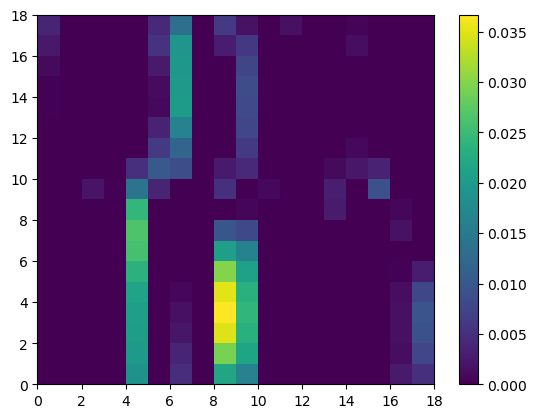

In [45]:
plt.pcolormesh(y[65,65,:,:])
plt.colorbar()

In [7]:
plt.pcolormesh(traindensity[0,65,65,:,:])
plt.colorbar()

IndexError: too many indices for array: array is 4-dimensional, but 5 were indexed

In [15]:
traindensity.shape

(542890, 324)

In [23]:
def build_model():
    tf.random.set_seed(420)

    model = models.Sequential()
    model.add(layers.Normalization())
    model.add(layers.Dense(324, activation='selu',
                           input_shape=(traindensity.shape[1],)))
    
    model.add(layers.Dense(144, activation='selu'))
    model.add(layers.Dense(36, activation='selu'))
    model.add(layers.Dense(8, activation='selu'))
    model.add(layers.Dense(4, activation='selu'))
    model.add(layers.Dense(36, activation='selu'))
    model.add(layers.Dense(144, activation='selu'))
    model.add(layers.Dense(324, activation='selu'))
    model.add(layers.Normalization(invert=True))
    model.add(layers.Dense(1))
    model.compile(optimizer='Nadam', loss=tf.keras.losses.Huber(delta=500.0), metrics=['mae'])
    return model

In [24]:

#trains and validates

model = build_model()
model.fit(traindensity, trainstress,epochs=10, batch_size=500, verbose=1, use_multiprocessing=True)
val_mse, val_mae = model.evaluate(testdensity, teststress, verbose=1)


Epoch 1/10
1086/1086 [==============================] - 10s 8ms/step - loss: 103083.5391 - mae: 356.3835
Epoch 2/10
1086/1086 [==============================] - 9s 8ms/step - loss: 81827.1953 - mae: 301.5028
Epoch 3/10
1086/1086 [==============================] - 9s 8ms/step - loss: 74622.2188 - mae: 282.3957
Epoch 4/10
1086/1086 [==============================] - 9s 8ms/step - loss: 71718.1953 - mae: 275.0663
Epoch 5/10
1086/1086 [==============================] - 9s 8ms/step - loss: 70325.2188 - mae: 271.4440
Epoch 6/10
1086/1086 [==============================] - 9s 9ms/step - loss: 69372.3438 - mae: 268.9467
Epoch 7/10
1086/1086 [==============================] - 9s 9ms/step - loss: 68702.8750 - mae: 267.1295
Epoch 8/10
1086/1086 [==============================] - 9s 9ms/step - loss: 68074.4297 - mae: 265.6298
Epoch 9/10
1086/1086 [==============================] - 9s 9ms/step - loss: 67551.5938 - mae: 264.3032
Epoch 10/10
16966/16966 [==============================] - 18s 1ms/step

In [26]:
import seaborn as sns


In [27]:
testvals=model.predict(testdensity)
#plt.plot(testvals[0:1000],teststress[0:1000],'o')

16966/16966 [==============================] - 17s 982us/step


TypeError: regplot() takes from 0 to 1 positional arguments but 2 were given

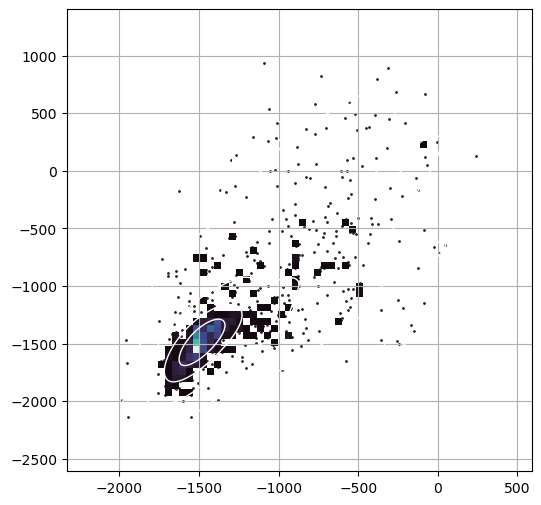

In [30]:
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=testvals[0:1000].flatten(), y=teststress[0:1000].flatten(), s=5, color=".15")
sns.histplot(x=testvals[0:1000].flatten(), y=teststress[0:1000].flatten(), bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=testvals[0:1000].flatten(), y=teststress[0:1000].flatten(), levels=5, color="w", linewidths=1)
plt.grid()

In [50]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(3, 3, activation='relu', input_shape=(18,18,324)),
  #tf.keras.layers.Conv2D(3, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=512, activation='relu'),
  tf.keras.layers.Dense(units=256, activation='relu'),
  tf.keras.layers.Dense(units=64, activation='relu'),
  tf.keras.layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer="adam")

history = model.fit(traindensity, trainstress, epochs=30, batch_size=200, verbose=1)


Epoch 1/30


ValueError: in user code:

    File "c:\Users\lfeltner\Anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\lfeltner\Anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\lfeltner\Anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\lfeltner\Anaconda3\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\lfeltner\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\lfeltner\Anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_8" is incompatible with the layer: expected shape=(None, 18, 18, 324), found shape=(None, 233, 233, 324)
